In [52]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [54]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Netowkrs/MNIST-data/")

Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/t10k-labels-idx1-ubyte.gz


In [55]:
tf.reset_default_graph()

In [56]:
#784 inputs
#half: 392
#half: 196
#392
#784

In [57]:
num_inputs = 784
num_hid1 = 392
num_hid2 = 196
num_hid3 = 392
num_outputs = 784

In [58]:
learning_rate = 0.01

In [59]:
act_func = tf.nn.relu

In [60]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [61]:
initializer = tf.variance_scaling_initializer()

In [62]:
w1 = tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([num_hid3,num_outputs]),dtype=tf.float32)

In [63]:
b1 = tf.Variable(tf.zeros(num_hid1))
b2 = tf.Variable(tf.zeros(num_hid2))
b3 = tf.Variable(tf.zeros(num_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [64]:
hid_layer1 = act_func(tf.matmul(X,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)

In [65]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [66]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [67]:
train = optimizer.minimize(loss)

In [68]:
init = tf.global_variables_initializer()

In [69]:
saver = tf.train.Saver()

In [70]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epochs in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
            
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epochs,training_loss))
        
    saver.save(sess,'./example_stacked_autoencoder.cpkt')

EPOCH: 0 LOSS: 0.023249652236700058
EPOCH: 1 LOSS: 0.021816838532686234
EPOCH: 2 LOSS: 0.021484313532710075
EPOCH: 3 LOSS: 0.020807715132832527
EPOCH: 4 LOSS: 0.01957441121339798


In [78]:
num_test_images = 10
with tf.Session() as sess:
    
    saver.restore(sess,'./example_stacked_autoencoder.cpkt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})
    smalls = hid_layer2.eval(feed_dict={X:mnist.test.images[:num_test_images]})

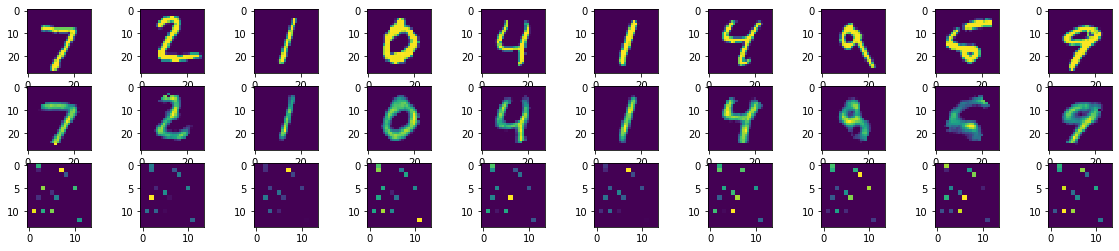

In [79]:
f, a = plt.subplots(3,10,figsize=(20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(results[i],(28,28)))
    a[2][i].imshow(np.reshape(smalls[i],(14,14)))